In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pdb
print('OpenCV Version: ', cv2.__version__)

OpenCV Version:  4.1.0


In [2]:
def display(img):
    img = np.array(img)
    plt.rcParams["figure.figsize"] = [9, 6]
    plt.imshow(img,'gray')
    plt.show()

In [3]:
def save(img, name):
    cv2.imwrite(name, img)

In [4]:
def percentageWhite(img): 
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[-1] if not is_binary(img) else img
    numWhite = np.count_nonzero(img)
    return numWhite * 100 / img.size

In [5]:
def is_binary(img):
    return np.array_equal(np.unique(img), np.array([0, 255])) or np.array_equal(np.unique(img), np.array([0, 1]))

In [6]:
def printInfo(img):
    print('Width x Height: {} x {}'.format(img.shape[1], img.shape[0]))
    print('Percentage White: {0:.2f}%'.format(percentageWhite(img)))
    print('Binarized: {}'.format(is_binary(img)))

In [14]:
from Denoiser import Denoiser
denoiser = Denoiser()

## Finding Rect Contour

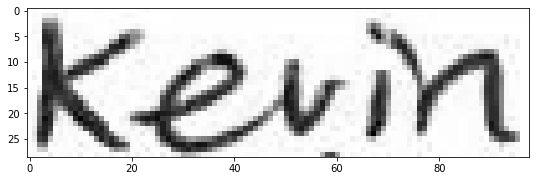

In [117]:
IMG_PATH = '../imgs/test/c27.png'
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
display(img)

BINARIZE: True
BINARIZATION METHOD: otsu
BLUR: True
BLURRING METHOD: bilateral
Width x Height: 98 x 29
Percentage White: 69.39%
Binarized: True


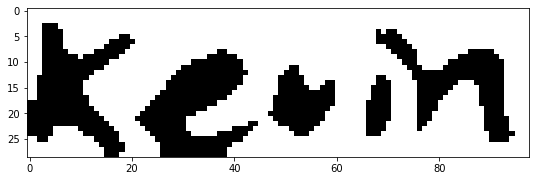

In [29]:
denoised = denoiser.denoise(img, userconfig=True)
printInfo(denoised)
display(denoised)

In [118]:
def segmentRect(img):
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[-1]
    contours = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0]) # sort by x coordinate
    for ctr in contours:
        x, y, w, h = cv2.boundingRect(ctr)
        roi = cv2.bitwise_not(img[y:y+h, x:x+w])
        if np.count_nonzero(roi) / roi.size > 0.1 and w / h < 1.2: # keep only those contours likely to be characters
            display(roi)

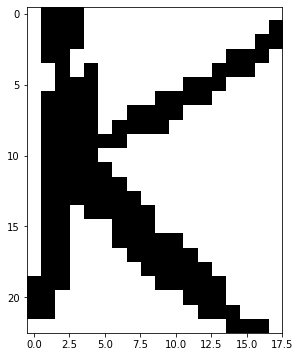

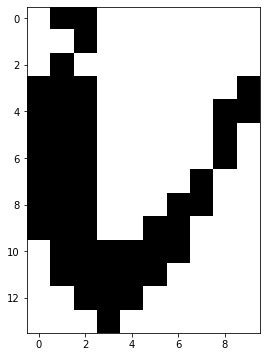

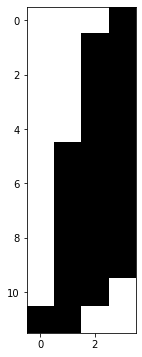

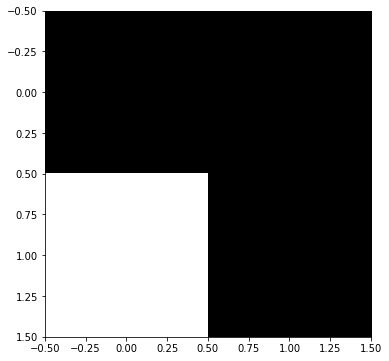

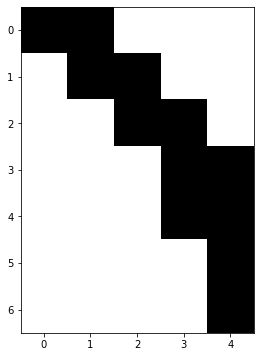

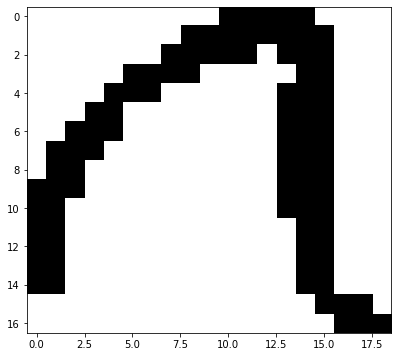

In [120]:
segmented = segmentRect(img)

## Using Connected Components Analysis

In [105]:
import skimage

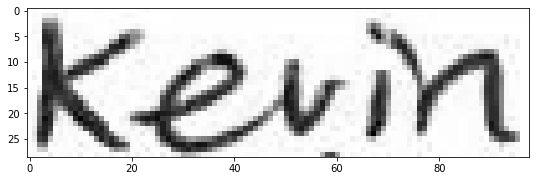

In [123]:
IMG_PATH = '../imgs/test/c27.png'
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
display(img)

In [130]:
from skimage import measure
def segmentCC(img):
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[-1]
    labels = measure.label(img, neighbors=8, background=0)
    print('[INFO] No. of connected components: {}'.format(np.unique(labels)))
    
    for label in np.unique(labels):
        if label == 0: # if background, ignore
            continue
        
        labelMask = np.zeros(img.shape, dtype='uint8')
        labelMask[labels == label] = 255 # set all non-background to white
        contours = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
        contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0]) # sort by x coordinate
        for ctr in contours:
            x, y, w, h = cv2.boundingRect(ctr)
            roi = cv2.bitwise_not(img[y:y+h, x:x+w])
            display(roi)

[INFO] No. of connected components: [0 1 2 3 4 5 6 7 8]


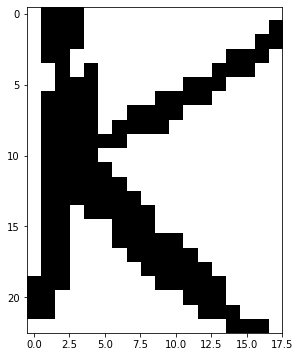

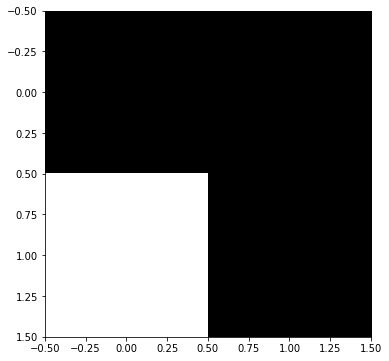

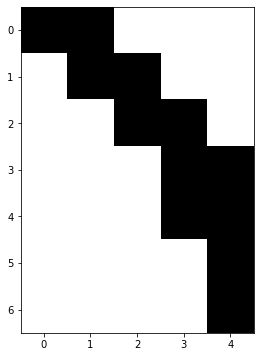

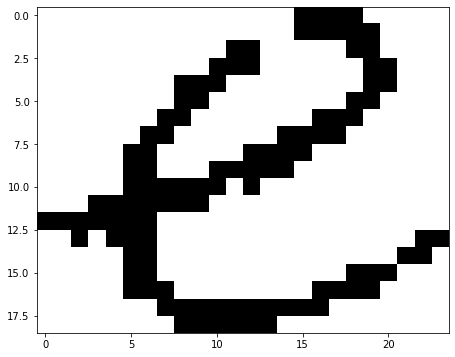

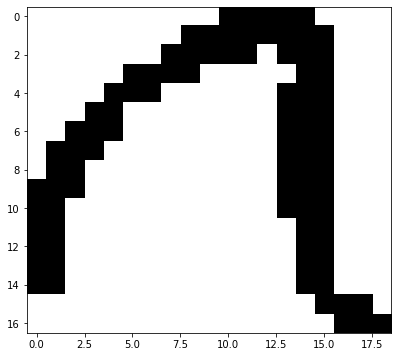

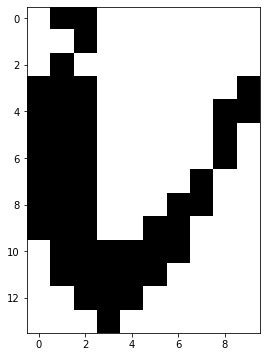

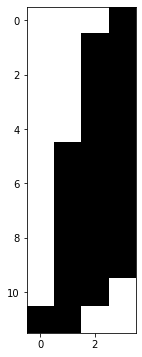

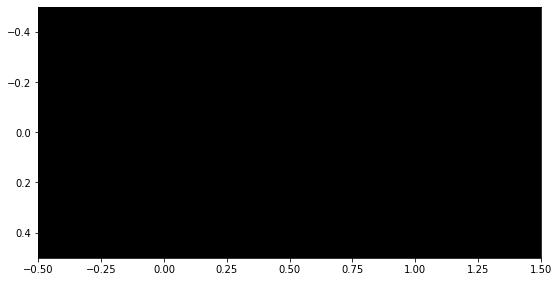

In [131]:
segmentCC(img)

## New Segmentation Approach

Width x Height: 212 x 47
Percentage White: 79.45%
Binarized: False


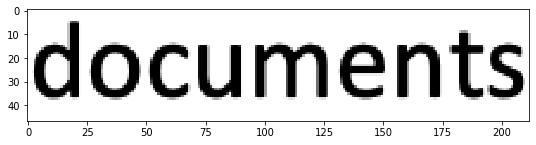

In [91]:
IMG_PATH = '../imgs/Screen Shot 2019-07-03 at 10.55.45 AM.png'
img = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
printInfo(img)
display(img)

In [92]:
def skeletonize(img):
    from skimage.morphology import skeletonize
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[-1]
    img[img==255] = 1
    img = skeletonize(img)
    return img

Width x Height: 212 x 47
Percentage White: 4.71%
Binarized: True


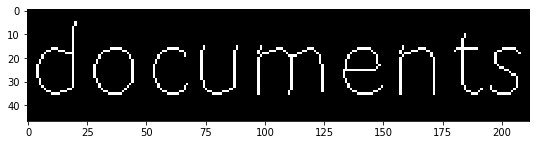

In [93]:
img = skeletonize(img)
printInfo(img)
display(img)

In [103]:
def getPSCs(img):
    img[img == 255] = 1 # normalize
    colSum = np.sum(img, axis=0)
    psc = [(idx, value) for idx, value in enumerate(colSum) if value == 0 or value == 1]
    return psc

In [104]:
PSCs = getPSCs(img)
print(PSCs)

[(0, 0), (1, 0), (2, 0), (3, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (67, 1), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (125, 0), (126, 0), (127, 0), (128, 0), (129, 0), (130, 0), (131, 0), (132, 0), (149, 1), (150, 0), (151, 0), (152, 0), (153, 0), (154, 0), (155, 0), (156, 0), (159, 1), (160, 1), (161, 1), (162, 1), (163, 1), (164, 1), (165, 1), (166, 1), (167, 1), (168, 1), (169, 1), (172, 0), (173, 0), (174, 0), (175, 0), (176, 0), (177, 0), (178, 0), (179, 0), (180, 1), (181, 1), (182, 1),

In [105]:
def displayPSCs(img, PSCs):
    plt.imshow(img, 'gray')
    for psc in PSCs:
        plt.axvline(x=psc[0], color='red')
    plt.show()

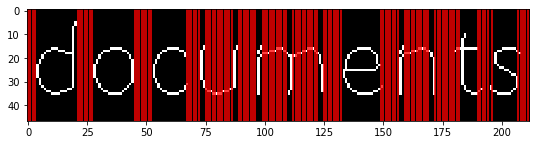

In [106]:
displayPSCs(img, PSCs)

In [114]:
def getAverageSCs(img, PSCs):
    avgSCs = []
    lastValue = PSCs[0][0]
    temp = []
    for psc in PSCs:
        idx, value = psc
        if value != lastValue:
            avgSCs.append((sum(temp) / len(temp), lastValue))
            lastValue = value
            temp = [idx]
        else:
            temp.append(idx)
            
    return avgSCs

In [115]:
avgSCs = getAverageSCs(img, PSCs)
print(avgSCs)

[(29.57894736842105, 0), (67.0, 1), (70.0, 0), (80.5, 1), (92.5, 0), (110.5, 1), (128.5, 0), (149.0, 1), (153.0, 0), (164.0, 1), (175.5, 0), (184.8, 1), (193.0, 0), (201.5, 1)]


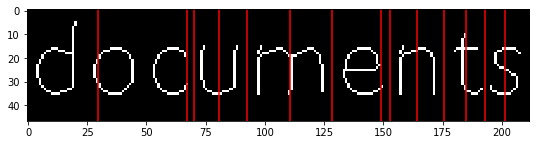

In [116]:
displayPSCs(img, avgSCs)

In [111]:
def getSCs(img, PSCs, threshold):
    SCs = []
    for psc in PSCs:
        idx, value = psc
        if value == 0:
            SCs.append(psc)
    return SCs

In [112]:
SCs = getSCs(img, PSCs, 7)
print(SCs)

[(0, 0), (1, 0), (2, 0), (3, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (125, 0), (126, 0), (127, 0), (128, 0), (129, 0), (130, 0), (131, 0), (132, 0), (150, 0), (151, 0), (152, 0), (153, 0), (154, 0), (155, 0), (156, 0), (172, 0), (173, 0), (174, 0), (175, 0), (176, 0), (177, 0), (178, 0), (179, 0), (192, 0), (193, 0), (194, 0), (208, 0), (209, 0), (210, 0), (211, 0)]


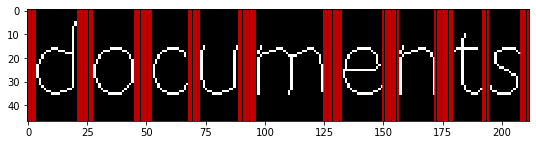

In [113]:
displayPSCs(img, SCs)

In [ ]:
def getCharImgs(img, SCs):
    for i in range(len(SCs)-1):
        display(int(img[:,SCs[i][0]:SCs[i+1][0]]))
        if i == len(SCs) - 2:
            display(img[:,SCs[i+1]:])

In [ ]:
getCharImgs(img, SCs)

## Anisotropic Filter